In [1]:
from IPython.display import set_matplotlib_formats, display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import mglearn
from cycler import cycler
import warnings
import seaborn as sns

warnings.filterwarnings("ignore")
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['image.cmap'] = "viridis"
plt.rcParams['image.interpolation'] = "none"
plt.rcParams['savefig.bbox'] = "tight"
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['legend.numpoints'] = 1
plt.rc('axes', prop_cycle=(
  #  cycler('color', mglearn.plot_helpers.cm_cycle.colors) +
    cycler('linestyle', ['-', '-', "--", (0, (3, 3)), (0, (1.5, 1.5))])))

np.set_printoptions(precision=3, suppress=True)

pd.set_option("display.max_columns", 8)
pd.set_option('precision', 2)

_all_ = ['np', #'mglearn', 
         'display', 'plt', 'pd']

In [2]:
data = pd.read_table('C:/1 Proyecto Samurai/30_04_2021/DATA31.rpt', sep="~")
df1 = pd.DataFrame(data)
df1.shape
#df1.tail()

(418, 420)

In [3]:
#df1.groupby("DIAS_MORA")["ID_CLIENTE"].count()

In [4]:
#variable = ['RESIDENCIA_PROVINCIA', 'RESIDENCIA_CORREGIMIENTO', "RESIDENCIA_DISTRITO", "TRABAJO_PROVINCIA"]
#df1["NOM_SUBACTIVIDADECONOMICA"].unique()

In [5]:
#df1.groupby("NOM_SUBACTIVIDADECONOMICA")['DIAS_MORA'].mean()

In [6]:
variables = ['PRODUCTO','EDAD','NIVEL_ENDEUDAMIENTO','TASA_AV','HIPOTECA_USO','DURACION',
'MONTO_BANCOS','HIPOTECA_MONTO','PREST_AUTO_MORA','MORA_OTROS','USO_OTROS','HIPOTECA_MORA','PREST_AUTO_DURACION','TARJ_CREDITO_DURACION',
'LROTATIVA_MORA','PREST_PERSONAL_USO','DURACION_OTROS','NUMDEPEND','LEASING_MONTO','PCOMERCIAL_MORA','DURACION_BANCOS',
'USO_BANCOS','HIPOTECA_DURACION','AGROPECUARIO_USO','PREST_PERSONAL_DURACION','LEASING_MORA','TMA_USO',
'PREST_PERSONAL_MORA','EXCLUIR','TRABAJO_MESES_CONTINUIDAD','MORA_BANCOS','NUMERO_EMPLEADOS', 'RESIDENCIA_PROVINCIA', 
'RESIDENCIA_CORREGIMIENTO',"RESIDENCIA_DISTRITO",'DIRECCION_RESIDENCIA','DIRECCION_TRABAJO',"TRABAJO_PROVINCIA","TRABAJO_DISTRITO",
'NOM_SUBACTIVIDADECONOMICA','DIAS_MORA']

In [7]:
df1 = df1[variables]
df1.shape

(418, 41)

In [8]:
#df1.info()

In [9]:
def impute(df):
    for name in df.select_dtypes("float"):
        df[name] = df[name].fillna(0)
    for name in df.select_dtypes(["category", "object"]):
        df[name] = df[name].fillna("None")
    return df

In [10]:
df2 = impute(df1)
#df2.info()

In [11]:
#df2.groupby('RESIDENCIA_CORREGIMIENTO')['DIAS_MORA'].mean()

In [12]:
#df2.groupby("DIAS_MORA")["EDAD"].count()

In [13]:
variables_nominales = df2.select_dtypes("object").columns
variables_nominales

Index(['RESIDENCIA_PROVINCIA', 'RESIDENCIA_CORREGIMIENTO',
       'RESIDENCIA_DISTRITO', 'TRABAJO_PROVINCIA', 'TRABAJO_DISTRITO',
       'NOM_SUBACTIVIDADECONOMICA'],
      dtype='object')

In [14]:
for name in variables_nominales:
    df2[name] = df2[name].astype("category")
#df2.info()

In [15]:
#df3.groupby('RESIDENCIA_CORREGIMIENTO')['DIAS_MORA'].mean()

In [16]:
def log(df):
    for colname in df.select_dtypes(exclude=["object","category"]).columns:
        df[colname] = df[colname].apply(np.log1p)
    return df

In [17]:
df3 = log(df2)
df3.describe()
df3 = impute(df3)

In [18]:
#valores_null = df3.isnull().sum()
#valores_null

In [19]:
from sklearn.feature_selection import mutual_info_regression
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

In [20]:
X = df3.copy()
y = X.pop("DIAS_MORA")

mi_scores = make_mi_scores(X, y)
mi_scores

USO_OTROS                    9.04e-02
DURACION_OTROS               8.56e-02
DURACION                     7.73e-02
PREST_PERSONAL_USO           4.61e-02
PREST_PERSONAL_DURACION      3.88e-02
MORA_OTROS                   3.55e-02
DURACION_BANCOS              3.04e-02
NUMDEPEND                    2.82e-02
TRABAJO_MESES_CONTINUIDAD    2.82e-02
NOM_SUBACTIVIDADECONOMICA    2.77e-02
RESIDENCIA_DISTRITO          2.66e-02
RESIDENCIA_CORREGIMIENTO     2.42e-02
TRABAJO_DISTRITO             1.99e-02
USO_BANCOS                   1.91e-02
HIPOTECA_USO                 1.63e-02
TARJ_CREDITO_DURACION        1.50e-02
RESIDENCIA_PROVINCIA         1.48e-02
NIVEL_ENDEUDAMIENTO          1.39e-02
PCOMERCIAL_MORA              1.29e-02
TASA_AV                      1.09e-02
PRODUCTO                     1.08e-02
PREST_AUTO_MORA              6.69e-03
EDAD                         4.42e-03
NUMERO_EMPLEADOS             0.00e+00
TRABAJO_PROVINCIA            0.00e+00
DIRECCION_TRABAJO            0.00e+00
DIRECCION_RE

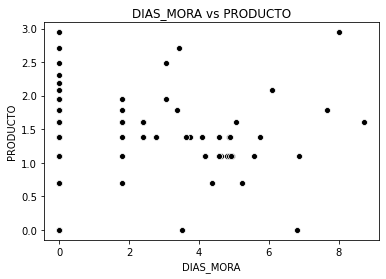

<Figure size 720x432 with 0 Axes>

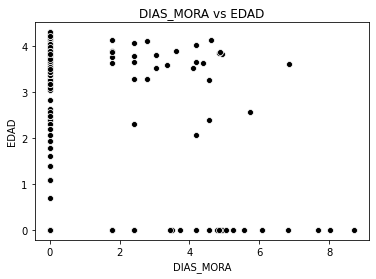

<Figure size 720x432 with 0 Axes>

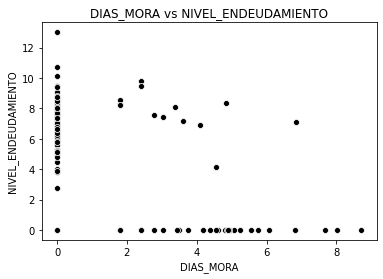

<Figure size 720x432 with 0 Axes>

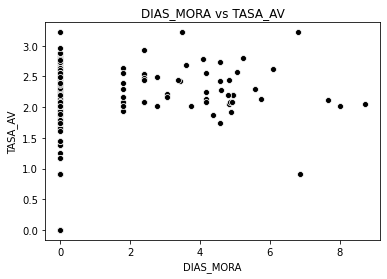

<Figure size 720x432 with 0 Axes>

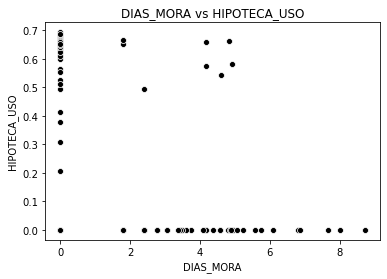

<Figure size 720x432 with 0 Axes>

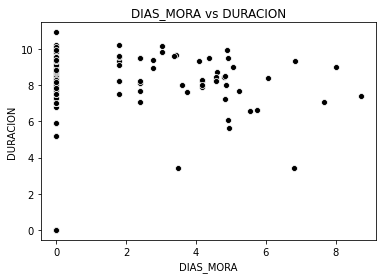

<Figure size 720x432 with 0 Axes>

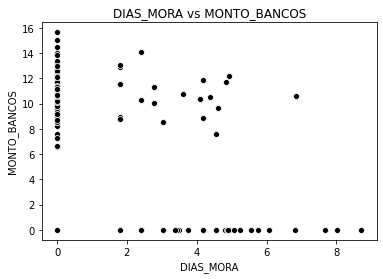

<Figure size 720x432 with 0 Axes>

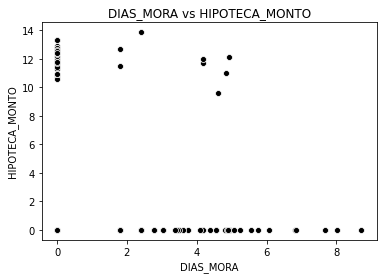

<Figure size 720x432 with 0 Axes>

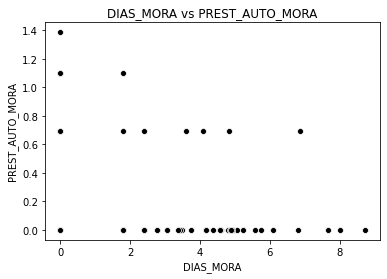

<Figure size 720x432 with 0 Axes>

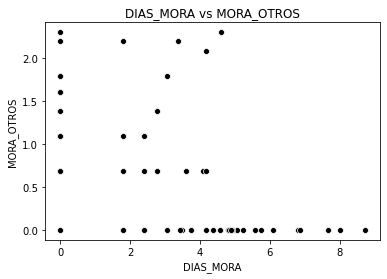

<Figure size 720x432 with 0 Axes>

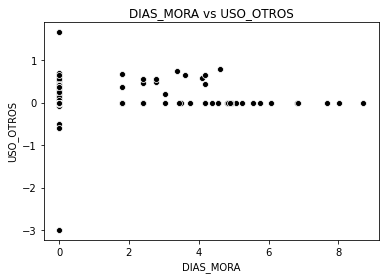

<Figure size 720x432 with 0 Axes>

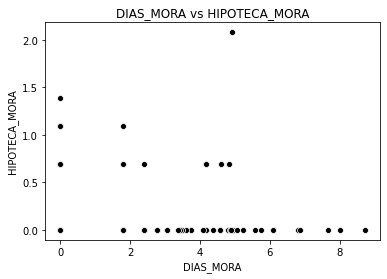

<Figure size 720x432 with 0 Axes>

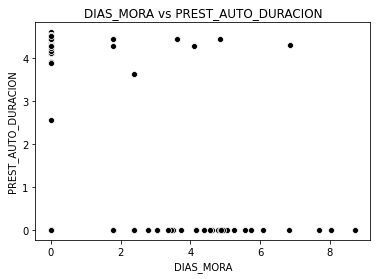

<Figure size 720x432 with 0 Axes>

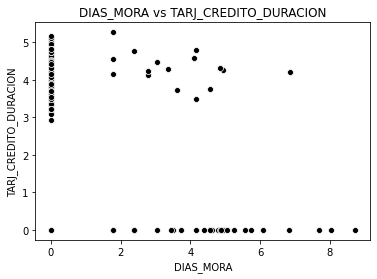

<Figure size 720x432 with 0 Axes>

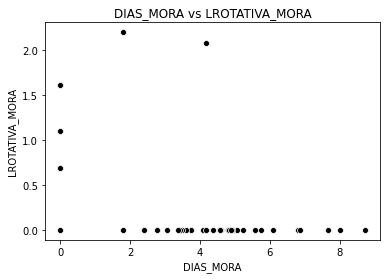

<Figure size 720x432 with 0 Axes>

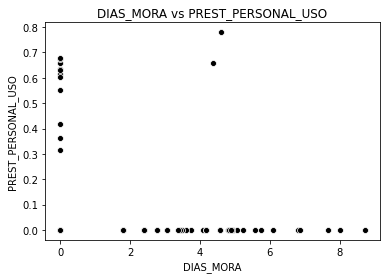

<Figure size 720x432 with 0 Axes>

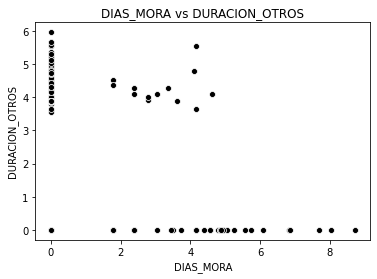

<Figure size 720x432 with 0 Axes>

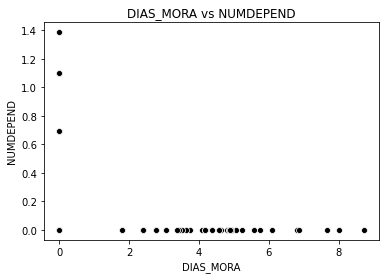

<Figure size 720x432 with 0 Axes>

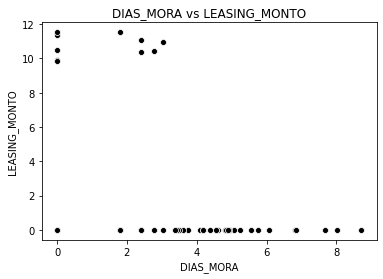

<Figure size 720x432 with 0 Axes>

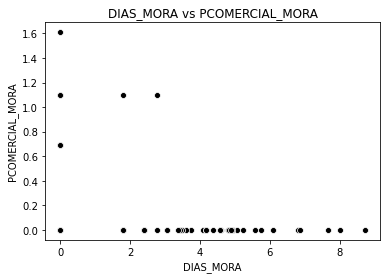

<Figure size 720x432 with 0 Axes>

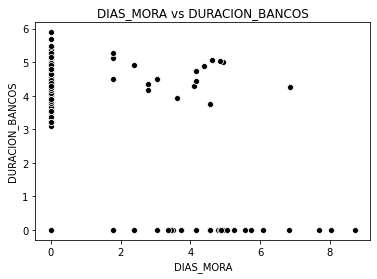

<Figure size 720x432 with 0 Axes>

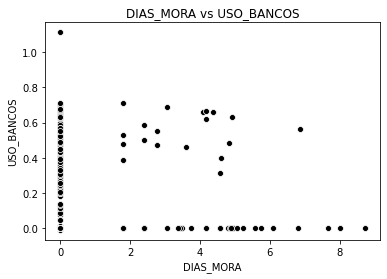

<Figure size 720x432 with 0 Axes>

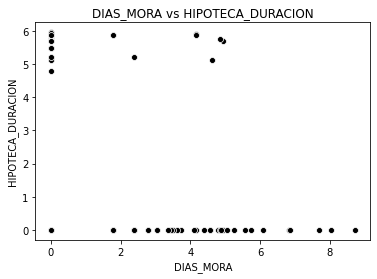

<Figure size 720x432 with 0 Axes>

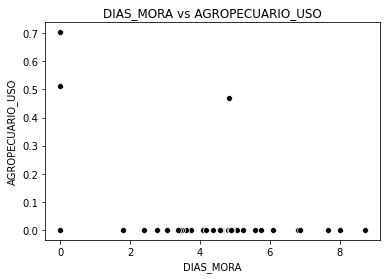

<Figure size 720x432 with 0 Axes>

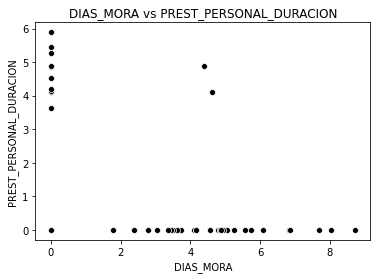

<Figure size 720x432 with 0 Axes>

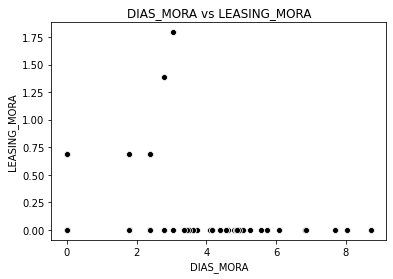

<Figure size 720x432 with 0 Axes>

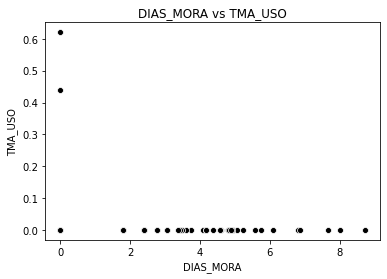

<Figure size 720x432 with 0 Axes>

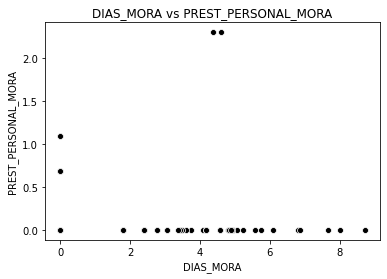

<Figure size 720x432 with 0 Axes>

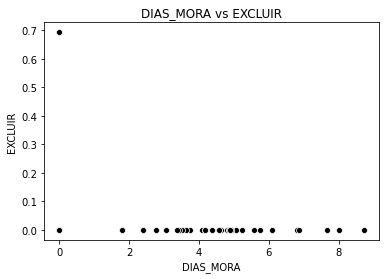

<Figure size 720x432 with 0 Axes>

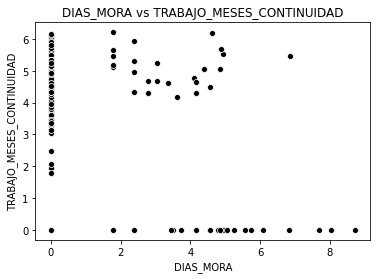

<Figure size 720x432 with 0 Axes>

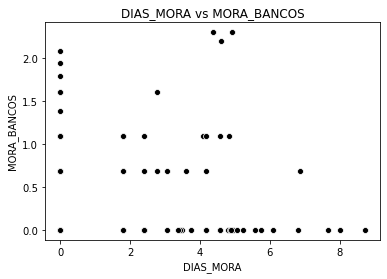

<Figure size 720x432 with 0 Axes>

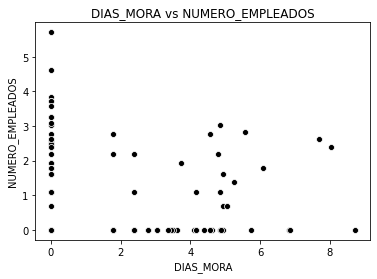

<Figure size 720x432 with 0 Axes>

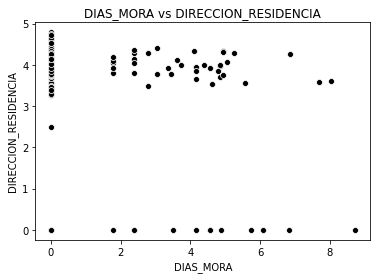

<Figure size 720x432 with 0 Axes>

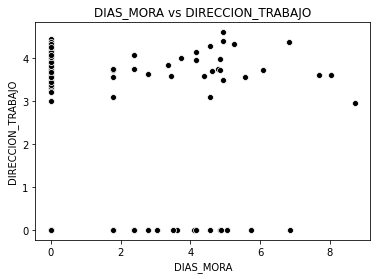

<Figure size 720x432 with 0 Axes>

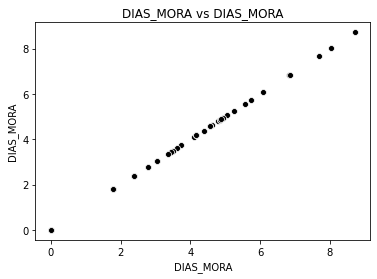

<Figure size 720x432 with 0 Axes>

In [21]:
for feature in df3.select_dtypes(exclude=["object","category"]).columns:
    fig = sns.scatterplot(data = df3,
                x = 'DIAS_MORA', 
                y = feature,  
                palette='pastel')
    plt.title("DIAS_MORA vs " + feature)
    plt.figure(figsize=(10,6))
    plt.show()

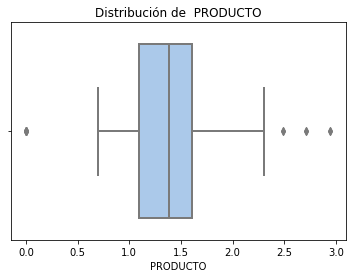

<Figure size 720x432 with 0 Axes>

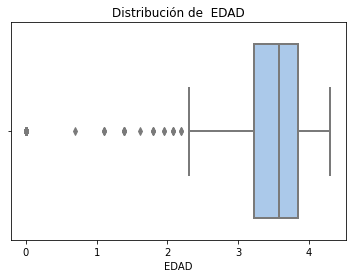

<Figure size 720x432 with 0 Axes>

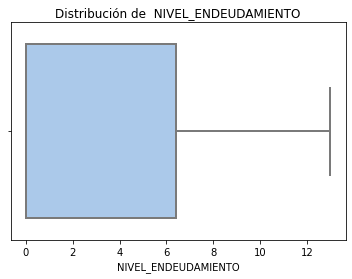

<Figure size 720x432 with 0 Axes>

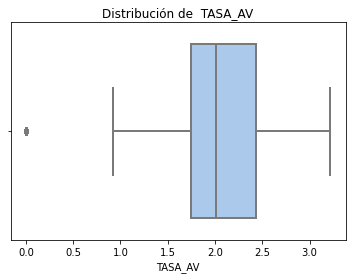

<Figure size 720x432 with 0 Axes>

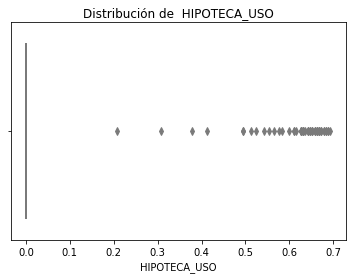

<Figure size 720x432 with 0 Axes>

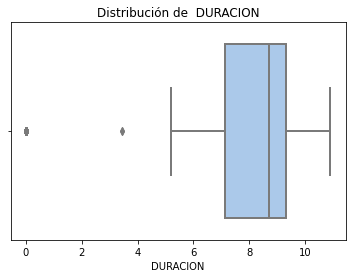

<Figure size 720x432 with 0 Axes>

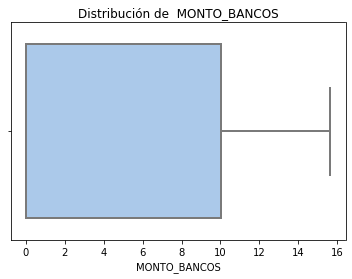

<Figure size 720x432 with 0 Axes>

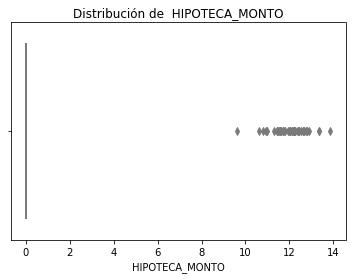

<Figure size 720x432 with 0 Axes>

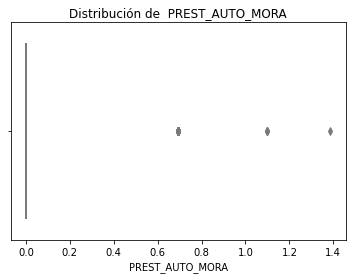

<Figure size 720x432 with 0 Axes>

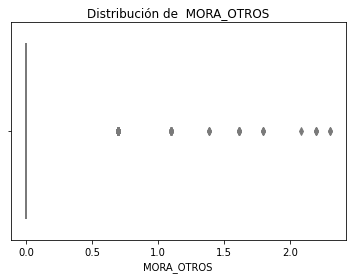

<Figure size 720x432 with 0 Axes>

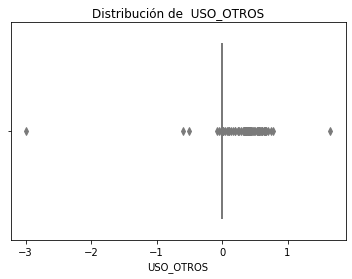

<Figure size 720x432 with 0 Axes>

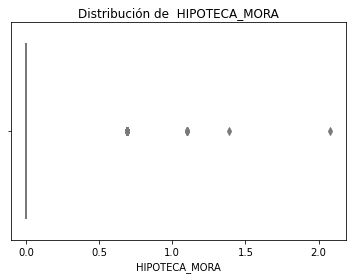

<Figure size 720x432 with 0 Axes>

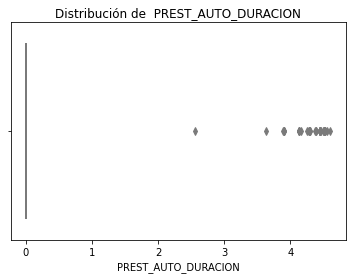

<Figure size 720x432 with 0 Axes>

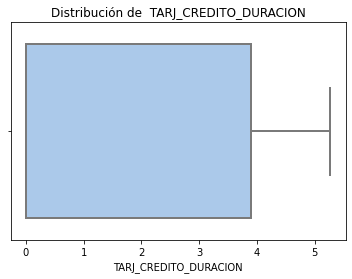

<Figure size 720x432 with 0 Axes>

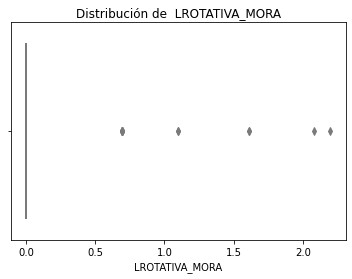

<Figure size 720x432 with 0 Axes>

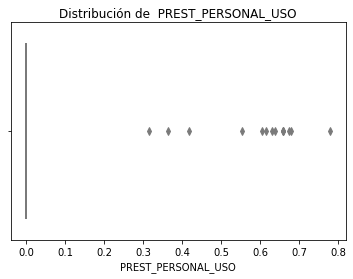

<Figure size 720x432 with 0 Axes>

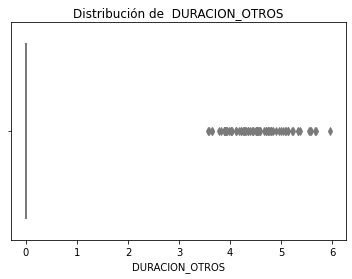

<Figure size 720x432 with 0 Axes>

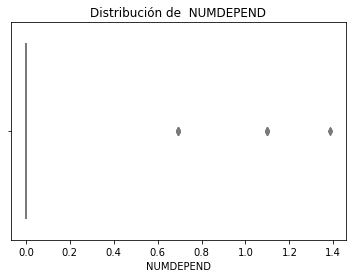

<Figure size 720x432 with 0 Axes>

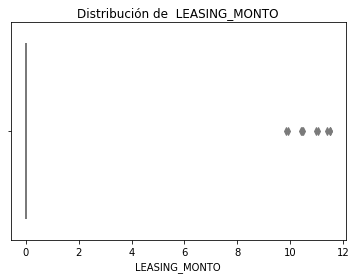

<Figure size 720x432 with 0 Axes>

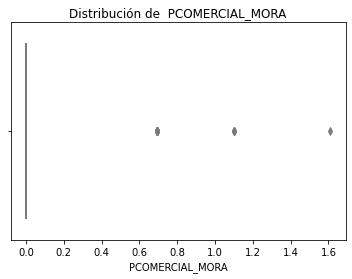

<Figure size 720x432 with 0 Axes>

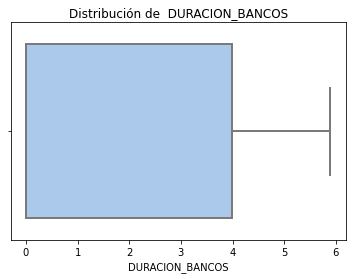

<Figure size 720x432 with 0 Axes>

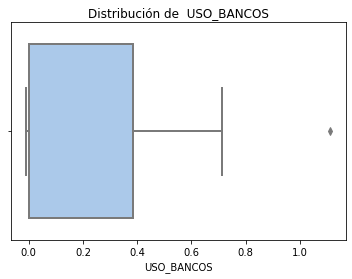

<Figure size 720x432 with 0 Axes>

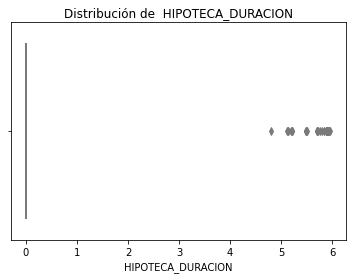

<Figure size 720x432 with 0 Axes>

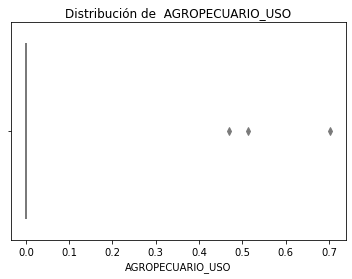

<Figure size 720x432 with 0 Axes>

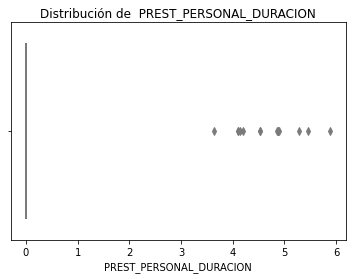

<Figure size 720x432 with 0 Axes>

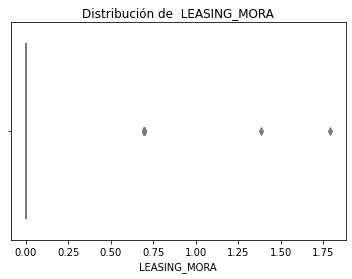

<Figure size 720x432 with 0 Axes>

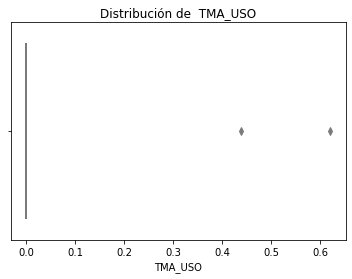

<Figure size 720x432 with 0 Axes>

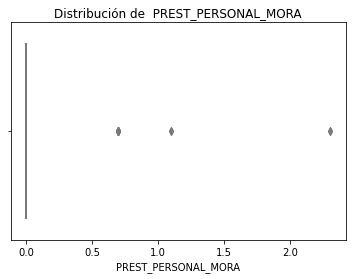

<Figure size 720x432 with 0 Axes>

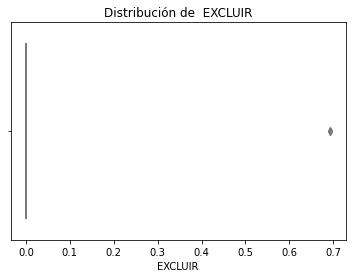

<Figure size 720x432 with 0 Axes>

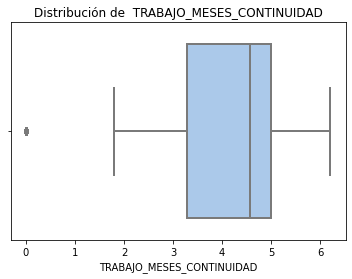

<Figure size 720x432 with 0 Axes>

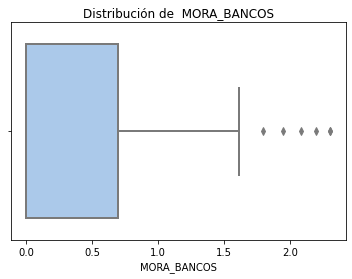

<Figure size 720x432 with 0 Axes>

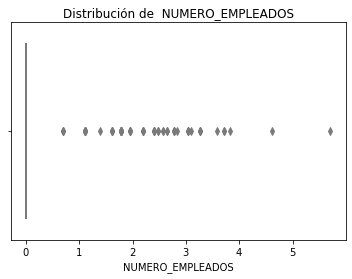

<Figure size 720x432 with 0 Axes>

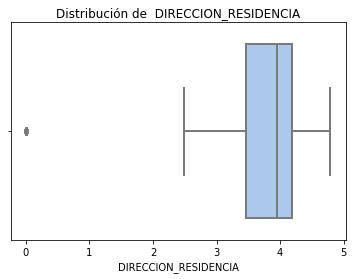

<Figure size 720x432 with 0 Axes>

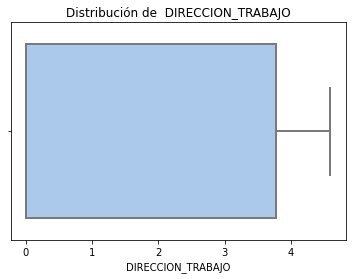

<Figure size 720x432 with 0 Axes>

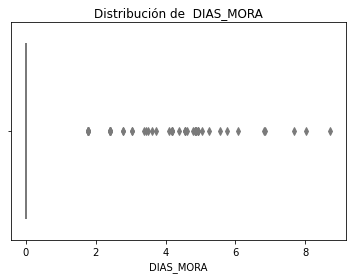

<Figure size 720x432 with 0 Axes>

In [22]:
for feature in df3.select_dtypes(exclude=["object","category"]).columns:
    fig = sns.boxplot(data = df3,
                x = feature,
                palette='pastel')
    plt.title("Distribución de  " + feature)
    plt.figure(figsize=(10,6))
    plt.show()

In [23]:
corr = df3.select_dtypes("float").corr()
#corr

In [24]:
def plot_corr_mat(corr):
    sns.set_style("white")
    # Generar una máscara para el triángulo superior
    mask = np.triu(np.ones_like(corr,dtype=bool))
    # Configurar el tamaño
    fig, ax = plt.subplots(figsize=(11,9))
    # Generar el colormap divergente
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    # Graficar el mapa de calor de la matriz de correlación
    sns.heatmap(corr, mask=mask, cmap=cmap, 
                vmax=.3, center=0,
                square=True, linewidths=0.5,
                cbar_kws={"shrink":.5})
    plt.show()

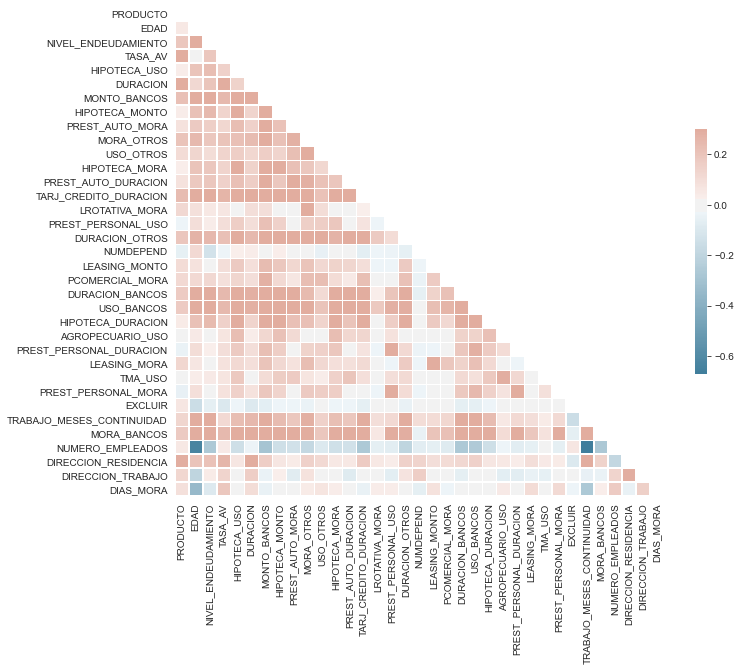

In [25]:
plot_corr_mat(corr)

df1.loc[df1['DIAS_MORA']> 90, 'mora_90d']= 'moroso'
df1.loc[df1['DIAS_MORA'].isnull(), 'mora_90d']= 'no_moroso'
df1.loc[df1['DIAS_MORA']<= 90, 'mora_90d']= 'no_moroso'

def group_transforms(df):
    X = pd.DataFrame()
    X["DURACION_PROVINCIA"] = df.groupby("RESIDENCIA_PROVINCIA")["DURACION"].transform("median")
    X["DURACION_CORREGIMIENTO"] = df.groupby("RESIDENCIA_CORREGIMIENTO")["DURACION"].transform("median")
    X["DURACION_PROVINCIA_T"] = df.groupby("TRABAJO_PROVINCIA")["DURACION"].transform("median")
    X["DURACION_CORREGIMIENTO"] = df.groupby("RESIDENCIA_CORREGIMIENTO")["DURACION"].transform("median")
    X["DURACION_ACTIVIDAD"] = df.groupby("NOM_SUBACTIVIDADECONOMICA")["DURACION"].transform("median")
    return X

In [26]:
#group_transforms(df3)

In [27]:
class CrossFoldEncoder:
    def __init__(self, encoder, **kwargs):
        self.encoder_ = encoder
        self.kwargs_ = kwargs  # keyword arguments for the encoder
        self.cv_ = KFold(n_splits=5)

    # Fit an encoder on one split and transform the feature on the
    # other. Iterating over the splits in all folds gives a complete
    # transformation. We also now have one trained encoder on each
    # fold.
    def fit_transform(self, X, y, cols):
        self.fitted_encoders_ = []
        self.cols_ = cols
        X_encoded = []
        for idx_encode, idx_train in self.cv_.split(X):
            fitted_encoder = self.encoder_(cols=cols, **self.kwargs_)
            fitted_encoder.fit(
                X.iloc[idx_encode, :], y.iloc[idx_encode],
            )
            X_encoded.append(fitted_encoder.transform(X.iloc[idx_train, :])[cols])
            self.fitted_encoders_.append(fitted_encoder)
        X_encoded = pd.concat(X_encoded)
        X_encoded.columns = [name + "_encoded" for name in X_encoded.columns]
        return X_encoded

    # To transform the test data, average the encodings learned from
    # each fold.
    def transform(self, X):
        from functools import reduce

        X_encoded_list = []
        for fitted_encoder in self.fitted_encoders_:
            X_encoded = fitted_encoder.transform(X)
            X_encoded_list.append(X_encoded[self.cols_])
        X_encoded = reduce(
            lambda x, y: x.add(y, fill_value=0), X_encoded_list
        ) / len(X_encoded_list)
        X_encoded.columns = [name + "_encoded" for name in X_encoded.columns]
        return X_encoded

In [28]:
from pandas.api.types import CategoricalDtype
from category_encoders import MEstimateEncoder
from sklearn.model_selection import KFold, cross_val_score
encoder = CrossFoldEncoder(MEstimateEncoder, m=1)
X_encoded = encoder.fit_transform(X, y, cols=["NOM_SUBACTIVIDADECONOMICA"])
X_encoded1 = encoder.fit_transform(X, y, cols=["RESIDENCIA_PROVINCIA"])
X_encoded2 = encoder.fit_transform(X, y, cols=["RESIDENCIA_DISTRITO"])
X_encoded3 = encoder.fit_transform(X, y, cols=["RESIDENCIA_CORREGIMIENTO"])
X_encoded4 = encoder.fit_transform(X, y, cols=["RESIDENCIA_DISTRITO"])
X_encoded5 = encoder.fit_transform(X, y, cols=["TRABAJO_PROVINCIA"])
X_encoded6 = encoder.fit_transform(X, y, cols=["TRABAJO_DISTRITO"])

In [29]:
df4 = pd.concat([df3, X_encoded, X_encoded1, X_encoded2, X_encoded3, X_encoded4, X_encoded5, X_encoded6], axis = 1)
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 48 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   PRODUCTO                           418 non-null    float64 
 1   EDAD                               418 non-null    float64 
 2   NIVEL_ENDEUDAMIENTO                418 non-null    float64 
 3   TASA_AV                            418 non-null    float64 
 4   HIPOTECA_USO                       418 non-null    float64 
 5   DURACION                           418 non-null    float64 
 6   MONTO_BANCOS                       418 non-null    float64 
 7   HIPOTECA_MONTO                     418 non-null    float64 
 8   PREST_AUTO_MORA                    418 non-null    float64 
 9   MORA_OTROS                         418 non-null    float64 
 10  USO_OTROS                          418 non-null    float64 
 11  HIPOTECA_MORA                      418 non-nu

In [30]:
df5 = df4.select_dtypes(exclude=["object","category"])
df5.shape

(418, 42)

In [31]:
# pca
from sklearn.decomposition import PCA

def apply_pca(X, standardize=True):
    # Standardize
    if standardize:
        X = (X - X.mean(axis=0)) / X.std(axis=0)
    # Create principal components
    pca = PCA()
    X_pca = pca.fit_transform(X)
    # Convert to dataframe
    component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
    X_pca = pd.DataFrame(X_pca, columns=component_names)
    # Create loadings
    loadings = pd.DataFrame(
        pca.components_.T,  # transpose the matrix of loadings
        columns=component_names,  # so the columns are the principal components
        index=X.columns,  # and the rows are the original features
    )
    return pca, X_pca, loadings


def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

In [32]:
X = df5.copy()
y = X.pop("DIAS_MORA")
apply_pca(X)

(PCA(),
       PC1   PC2   PC3   PC4  ...      PC38      PC39      PC40      PC41
 0   -2.56 -0.71  1.63 -0.77  ... -1.43e-02  2.41e-02 -4.50e-03 -9.45e-17
 1   -3.20  0.27  2.32 -1.11  ...  6.62e-03 -1.42e-04  6.78e-04 -3.98e-16
 2   -2.46 -1.23  1.74 -0.71  ... -5.35e-02  5.12e-03  1.73e-03 -2.70e-16
 3   -2.73 -2.13  0.62 -0.08  ...  1.82e-02 -1.03e-02  7.69e-03  2.46e-16
 4   -2.04 -2.87  1.00 -0.51  ... -2.18e-03  3.19e-03  1.25e-02 -2.96e-17
 ..    ...   ...   ...   ...  ...       ...       ...       ...       ...
 413 -3.11  6.08 -0.89  0.32  ... -1.58e-02  1.73e-02 -6.19e-03  4.52e-17
 414 -2.07  1.71 -0.83  0.74  ...  2.47e-02 -1.29e-02  1.45e-03  1.20e-16
 415  2.51 -3.59 -2.38  0.83  ...  2.19e-01  1.24e-01 -4.67e-02  9.64e-17
 416 -4.48  6.18  0.91 -0.47  ... -1.01e-02  2.90e-02 -2.25e-02 -7.01e-17
 417 -4.48  6.18  0.91 -0.47  ... -1.01e-02  2.90e-02 -2.25e-02 -7.01e-17
 
 [418 rows x 41 columns],
                                         PC1       PC2       PC3       PC4  

In [33]:
from sklearn.cluster import KMeans
pca1 = PCA(n_components= 5).fit_transform(X)
kmeans = KMeans(n_clusters=5, init="k-means++", max_iter=300, random_state=42)
y_means = kmeans.fit_predict(pca1)

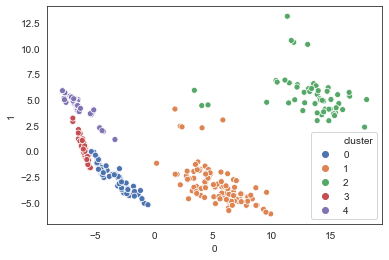

In [34]:
kmeans = KMeans(n_clusters=5, init="k-means++", max_iter=300, random_state=42)
df_clusters = pd.DataFrame(pca1)
df_clusters["cluster"] = y_means
sns.scatterplot(df_clusters.iloc[:,0] , df_clusters.iloc[:,1] ,
                data=df_clusters, hue="cluster", palette="deep")

In [35]:
df_clusters.columns = ['PC1', 'PC2','PC3','PC4', 'PC5', 'cluster']
df6 = pd.concat([df5, df_clusters], axis = 1)

In [36]:
#df1.groupby("DIAS_MORA")["EDAD"].count()

In [37]:
df6.loc[df6['DIAS_MORA']> np.log1p(90), 'mora_90d']= 1
df6.loc[df6['DIAS_MORA']<= np.log1p(90), 'mora_90d']= 0

In [38]:
#df6[df6['DIAS_MORA']> np.log1p(90)]

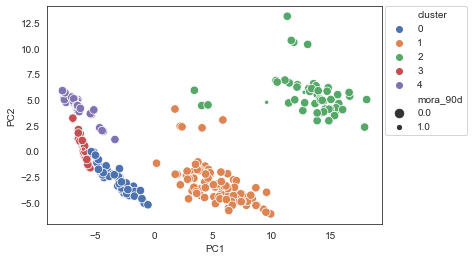

In [39]:
ax=sns.scatterplot(df6['PC1'] , df6['PC2'] ,
                data=df6, hue="cluster", size = 'mora_90d', palette="deep")
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

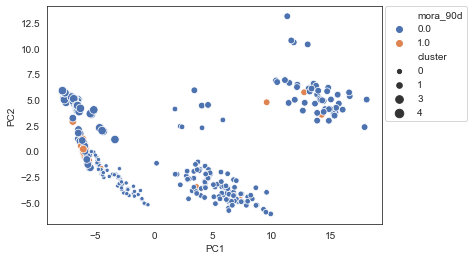

In [40]:
ax=sns.scatterplot(df6['PC1'] , df6['PC2'] ,
                data=df6, size="cluster", hue = 'mora_90d',palette="deep")
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

In [91]:
df6.groupby("cluster")["PC1"].mean()

cluster
0   -3.74
1    5.48
2   13.26
3   -5.91
4   -6.72
Name: PC1, dtype: float64

In [41]:
df6.groupby("cluster")["mora_90d"].sum()

cluster
0     1.0
1     2.0
2     3.0
3    16.0
4     0.0
Name: mora_90d, dtype: float64

In [42]:
df6.groupby("cluster")["mora_90d"].count()

cluster
0    111
1    110
2     54
3     71
4     72
Name: mora_90d, dtype: int64

In [43]:
var_modelo = [
'PREST_PERSONAL_DURACION',
'PREST_PERSONAL_USO',
'PREST_PERSONAL_MORA',
'HIPOTECA_MORA',
'TRABAJO_PROVINCIA_encoded',
'HIPOTECA_USO',
'HIPOTECA_DURACION',
'TRABAJO_DISTRITO_encoded',
'HIPOTECA_MONTO',
'TRABAJO_MESES_CONTINUIDAD',
'DIRECCION_RESIDENCIA',
'mora_90d']


In [61]:
df7 = df6[var_modelo]
df7_cluster_3 = df6[df6["cluster"]==3][var_modelo]
print(
df7.shape,
df7_cluster_3.shape)

(418, 12) (71, 12)


In [45]:
### importing lazypredict library
import lazypredict
### importing LazyClassifier for classification problem
from lazypredict.Supervised import LazyClassifier
### importing LazyClassifier for classification problem because here we are solving Classification use case.
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

In [64]:
from sklearn.model_selection import train_test_split
X = df7.copy()
y = X.pop("mora_90d")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state =123)
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric = None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [00:01<00:00, 21.97it/s]


In [65]:
X_cluster_3 = df7_cluster_3.copy()
y_cluster_3 = X_cluster_3.pop("mora_90d")
X_train, X_test, y_train, y_test = train_test_split(X_cluster_3, y_cluster_3, test_size=.5, random_state =123)
clf_cluster_3 = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric = None)
models_cluster_3,predictions_cluster_3 = clf_cluster_3.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [00:01<00:00, 14.94it/s]


In [66]:
print(models_cluster_3)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
NearestCentroid                    0.78               0.77     0.77      0.79   
LinearDiscriminantAnalysis         0.81               0.61     0.61      0.77   
LinearSVC                          0.81               0.56     0.56      0.74   
PassiveAggressiveClassifier        0.72               0.55     0.55      0.71   
ExtraTreeClassifier                0.72               0.55     0.55      0.71   
ExtraTreesClassifier               0.72               0.55     0.55      0.71   
KNeighborsClassifier               0.78               0.54     0.54      0.72   
RandomForestClassifier             0.69               0.54     0.54      0.69   
BaggingClassifier                  0.69               0.54     0.54      0.69   
LabelSpreading                     0.75               0.53     0.53      0.70   
LabelPropagation            

In [67]:
print(models)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
Perceptron                         0.90               0.65     0.65      0.92   
NearestCentroid                    0.78               0.64     0.64      0.84   
PassiveAggressiveClassifier        0.92               0.60     0.60      0.93   
QuadraticDiscriminantAnalysis      0.18               0.57     0.57      0.25   
RandomForestClassifier             0.95               0.56     0.56      0.94   
LGBMClassifier                     0.95               0.55     0.55      0.94   
LabelPropagation                   0.95               0.55     0.55      0.94   
XGBClassifier                      0.95               0.55     0.55      0.94   
ExtraTreesClassifier               0.95               0.55     0.55      0.94   
LabelSpreading                     0.95               0.55     0.55      0.94   
AdaBoostClassifier          

In [87]:
df_final = pd.DataFrame(data)
df_final.loc[df_final['DIAS_MORA']> np.log1p(90), 'mora_90d']= 1
df_final.loc[df_final['DIAS_MORA']<= np.log1p(90), 'mora_90d']= 0

def media1 (data, variable):
    print( data.groupby('mora_90d').agg(
            {
            # variable[i]: 'mean',
             variable: 'mean'
            }    
        )
        )

In [109]:
for variable in ['PREST_PERSONAL_DURACION','PREST_PERSONAL_USO','PREST_PERSONAL_MORA','HIPOTECA_MORA','HIPOTECA_USO',
                 'HIPOTECA_DURACION','HIPOTECA_MONTO','TRABAJO_MESES_CONTINUIDAD','DIRECCION_RESIDENCIA']:
        media1(df_final,variable)

          PREST_PERSONAL_DURACION
mora_90d                         
0.00                        10.26
1.00                         9.10
          PREST_PERSONAL_USO
mora_90d                    
0.00                    0.06
1.00                    0.10
          PREST_PERSONAL_MORA
mora_90d                     
0.00                     0.09
1.00                     0.86
          HIPOTECA_MORA
mora_90d               
0.00               0.32
1.00               0.71
          HIPOTECA_USO
mora_90d              
0.00              0.23
1.00              0.32
          HIPOTECA_DURACION
mora_90d                   
0.00                  86.97
1.00                 114.71
          HIPOTECA_MONTO
mora_90d                
0.00            56095.15
1.00            95675.01
          TRABAJO_MESES_CONTINUIDAD
mora_90d                           
0.00                         137.81
1.00                         189.60
          DIRECCION_RESIDENCIA
mora_90d                      
0.00                  

In [127]:
df_final1 = pd.concat([df_final, df_clusters], axis = 1)
columns = ['ID_CLIENTE', 'cluster']
#z = df_final.reindex(columns =columns)
df_final1[columns].to_csv('cluster.csv', header=True, index=True)

In [104]:
var_modelo1 = [
'MONTO_BANCOS',
'DURACION_BANCOS',
'MORA_BANCOS',
'USO_BANCOS',
'HIPOTECA_DURACION',
'HIPOTECA_USO',
'HIPOTECA_MONTO',
'TARJ_CREDITO_DURACION',
'HIPOTECA_MORA',
'mora_90d']

df71 = df6[var_modelo1]
df71_cluster_3 = df6[df6["cluster"]==3][var_modelo1]
print(
df71.shape,
df71_cluster_3.shape)

#from sklearn.model_selection import train_test_split
X1 = df71.copy()
y1 = X1.pop("mora_90d")
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=.5, random_state =123)
clf1 = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric = None)
models1,predictions1 = clf1.fit(X1_train, X1_test, y1_train, y1_test)

X1_cluster_3 = df71_cluster_3.copy()
y1_cluster_3 = X1_cluster_3.pop("mora_90d")
X1_train, X1_test, y1_train, y1_test = train_test_split(X1_cluster_3, y1_cluster_3, test_size=.5, random_state =123)
clf1_cluster_3 = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric = None)
models1_cluster_3,predictions1_cluster_3 = clf1_cluster_3.fit(X1_train, X1_test, y1_train, y1_test)

  0%|          | 0/29 [00:00<?, ?it/s]

(418, 10) (71, 10)


100%|██████████| 29/29 [00:01<00:00, 26.63it/s]


In [105]:
print(models1_cluster_3)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
AdaBoostClassifier                 0.78               0.50     0.50      0.68   
BaggingClassifier                  0.78               0.50     0.50      0.68   
XGBClassifier                      0.78               0.50     0.50      0.68   
SVC                                0.78               0.50     0.50      0.68   
SGDClassifier                      0.78               0.50     0.50      0.68   
RidgeClassifierCV                  0.78               0.50     0.50      0.68   
RidgeClassifier                    0.78               0.50     0.50      0.68   
RandomForestClassifier             0.78               0.50     0.50      0.68   
QuadraticDiscriminantAnalysis      0.78               0.50     0.50      0.68   
Perceptron                         0.22               0.50     0.50      0.08   
PassiveAggressiveClassifier 

In [106]:
print(models1)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
QuadraticDiscriminantAnalysis      0.44               0.71     0.71      0.58   
DummyClassifier                    0.91               0.54     0.54      0.92   
RandomForestClassifier             0.96               0.50     0.50      0.94   
Perceptron                         0.96               0.50     0.50      0.94   
RidgeClassifier                    0.96               0.50     0.50      0.94   
RidgeClassifierCV                  0.96               0.50     0.50      0.94   
LogisticRegression                 0.96               0.50     0.50      0.94   
BaggingClassifier                  0.96               0.50     0.50      0.94   
LinearSVC                          0.96               0.50     0.50      0.94   
ExtraTreesClassifier               0.96               0.50     0.50      0.94   
SVC                         

In [107]:
var_modelo2 = [
'RESIDENCIA_DISTRITO_encoded',
'RESIDENCIA_DISTRITO_encoded',
'RESIDENCIA_PROVINCIA_encoded',
'RESIDENCIA_CORREGIMIENTO_encoded',
'TASA_AV',
'DURACION',
'PRODUCTO',
'mora_90d']

df72 = df6[var_modelo2]
df72_cluster_3 = df6[df6["cluster"]==3][var_modelo2]
print(
df72.shape,
df72_cluster_3.shape)

#from sklearn.model_selection import train_test_split
X2 = df72.copy()
y2 = X2.pop("mora_90d")
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=.5, random_state =123)
clf2 = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric = None)
models2,predictions2 = clf2.fit(X2_train, X2_test, y2_train, y2_test)

X2_cluster_3 = df72_cluster_3.copy()
y2_cluster_3 = X2_cluster_3.pop("mora_90d")
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_cluster_3, y2_cluster_3, test_size=.5, random_state =123)
clf2_cluster_3 = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric = None)
models2_cluster_3,predictions2_cluster_3 = clf2_cluster_3.fit(X2_train, X2_test, y2_train, y2_test)

100%|██████████| 29/29 [00:00<00:00, 937.99it/s]

(418, 10) (71, 10)


In [108]:
print(models2_cluster_3)

Empty DataFrame
Columns: [Accuracy, Balanced Accuracy, ROC AUC, F1 Score, Time Taken]
Index: []
